In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from scipy import stats
import numpy as np  

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

<Axes: xlabel='MEDV'>

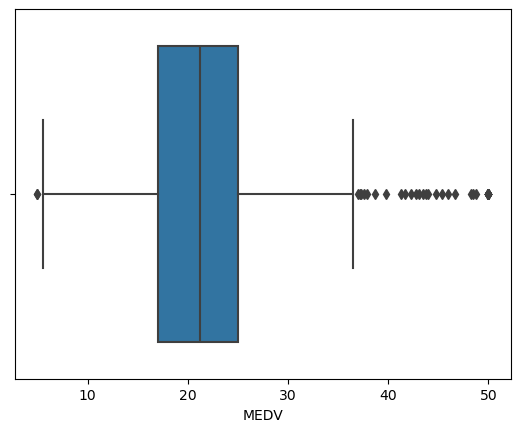

In [6]:
#task 2
sns.boxplot(x='MEDV', data=boston_df)

Text(0.5, 1.0, 'Charles River Bar Plot')

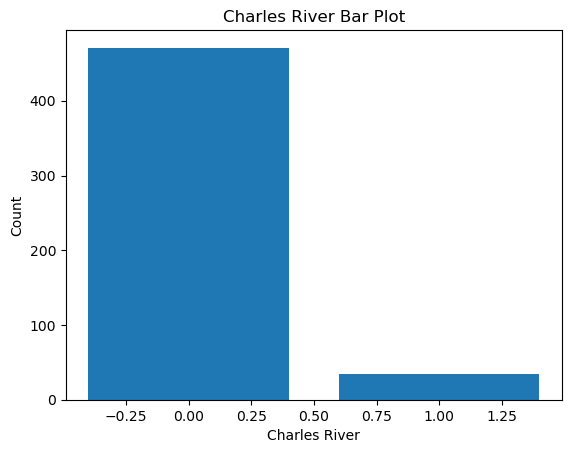

In [8]:
plt.bar(boston_df['CHAS'].unique(), boston_df['CHAS'].value_counts())  
plt.xlabel('Charles River')  
plt.ylabel('Count')  
plt.title('Charles River Bar Plot')

<Axes: xlabel='AGE_GROUP', ylabel='MEDV'>

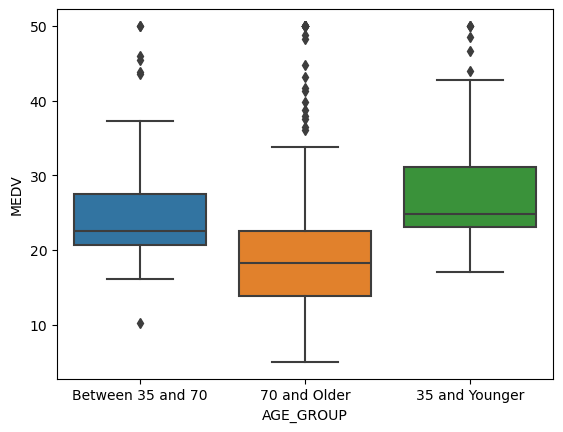

In [9]:
def age_group(x):  
    if x <= 35:  
        return '35 and Younger'  
    elif x <= 70:  
        return 'Between 35 and 70'  
    else:  
        return '70 and Older'  
  
boston_df['AGE_GROUP'] = boston_df['AGE'].apply(age_group)  
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)

Text(0, 0.5, 'Proportion of Non-retail Business Acres')

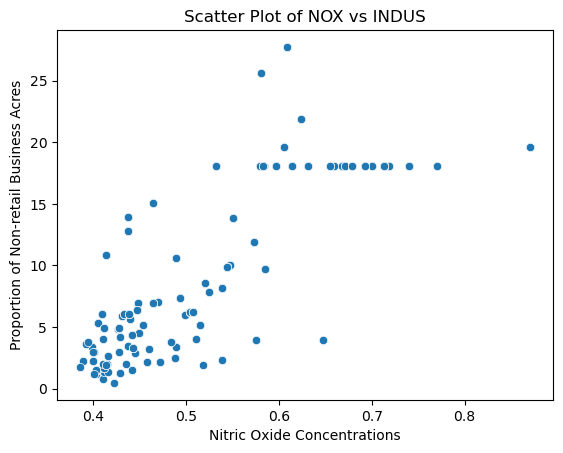

In [10]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)  
plt.title('Scatter Plot of NOX vs INDUS')  
plt.xlabel('Nitric Oxide Concentrations')  
plt.ylabel('Proportion of Non-retail Business Acres')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Pupil to Teacher Ratio')

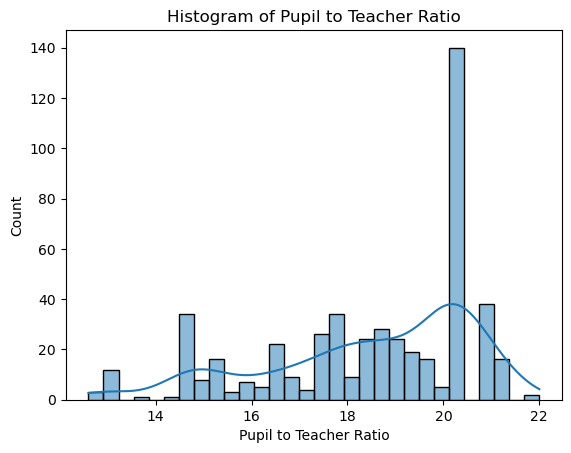

In [11]:
sns.histplot(boston_df['PTRATIO'], bins=30, kde=True)  
plt.title('Histogram of Pupil to Teacher Ratio')  
plt.xlabel('Pupil to Teacher Ratio')

In [13]:
#task 3
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#H_0 There isn't a significant difference in median value of houses bounded by the Charles river.
#H_1 There is a significant difference in median value of houses bounded by the Charles river.
charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']  
not_charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']  
   
t_stat, p_val = stats.ttest_ind(charles_river, not_charles_river)  

print(f"T-statistic: {t_stat}, P-value: {p_val}")
#p<0.05,receive H_1,there is a significant difference in median value of houses bounded by the Charles river.

T-statistic: 3.996437466090509, P-value: 7.390623170519902e-05


In [15]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#H_0 There isn't a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
#H_1 There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
f_stat, p_val = stats.f_oneway(boston_df[boston_df['AGE'] <= 35]['MEDV'], 
                               boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV'], 
                               boston_df[boston_df['AGE'] > 70]['MEDV'])  
  
print(f"F-statistic: {f_stat}, P-value: {p_val}")  
#p<0.05,receive H_1,there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


In [18]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#H_0 There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
#H_1 There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
correlation = np.corrcoef(boston_df['NOX'], boston_df['INDUS'])[0, 1]  

print(f"Pearson Correlation Coefficient: {correlation}")
#Pearson Correlation Coefficient: 0.7636514469209152,so there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Pearson Correlation Coefficient: 0.7636514469209152


In [20]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
X = boston_df[['DIS']]  
y = boston_df['MEDV']  
X = sm.add_constant(X) 
  
model = sm.OLS(y, X).fit()  
  
print(model.summary())
#distance add 1 then the median value of owner occupied homes add 1.0916

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        17:17:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0